In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
variance=VarianceThreshold(threshold=0)
from sklearn.preprocessing import LabelEncoder
label =LabelEncoder

In [2]:
#importing th dataset for training
train=pd.read_csv("/content/train.csv")

In [3]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.tail()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0
4208,8417,110.85,z,r,ae,c,d,aa,g,w,...,1,0,0,0,0,0,0,0,0,0


In [5]:
#describing the data
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#importing the testing data
test=pd.read_csv("/content/test.csv")

In [7]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [8]:
test.tail()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0
4208,8416,t,aa,ai,c,d,aa,g,r,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
#describing the test dataset
test.describe()


,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#checking he null values in the training dataset
train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [11]:
#removing the ID column from the dataset
train_target=train["y"]
train_data=train.drop(["y","ID"],axis=1)

In [12]:
train_data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train_data.var().sort_values().head(15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


X233    0.000000
X11     0.000000
X107    0.000000
X293    0.000000
X290    0.000000
X330    0.000000
X93     0.000000
X268    0.000000
X297    0.000000
X235    0.000000
X347    0.000000
X289    0.000000
X207    0.000238
X257    0.000238
X39     0.000238
dtype: float64

In [14]:
train_data_without_zero_var=variance.fit_transform(train_data.iloc[:,9:])
train_data_without_zero_var

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
labeled_data=train_data.iloc[:,0:8]
labeled_data.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [16]:
labeled_data.nunique()

X0    47
X1    27
X2    44
X3     7
X4     4
X5    29
X6    12
X8    25
dtype: int64

In [17]:
labeled_data1=labeled_data.apply(label().fit_transform)
labeled_data1.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13


In [18]:
labeled_data1.var()

X0    188.741938
X1     72.777974
X2    118.808135
X3      3.027295
X4      0.005461
X5     68.076236
X6      8.508730
X8     49.531868
dtype: float64

In [19]:
train_data_zero_var_final=pd.DataFrame(train_data_without_zero_var)
train_data_zero_var_final.head()

,0,1,2,3,4,5,6,7,8,9,...,345,346,347,348,349,350,351,352,353,354
0,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
final_train_data=pd.concat([labeled_data1,train_data_zero_var_final],axis=1)
final_train_data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,0,1,...,345,346,347,348,349,350,351,352,353,354
0,32,23,17,0,3,24,9,14,0,1,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
final_train_data.isnull().any()

X0     False
X1     False
X2     False
X3     False
X4     False
       ...  
350    False
351    False
352    False
353    False
354    False
Length: 363, dtype: bool

In [22]:
test=test.drop(["ID"],axis=1)
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
test.nunique()

X0      49
X1      27
X2      45
X3       7
X4       4
        ..
X380     2
X382     2
X383     2
X384     2
X385     2
Length: 376, dtype: int64

In [24]:
test.isnull().any()

X0      False
X1      False
X2      False
X3      False
X4      False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 376, dtype: bool

In [25]:
test.var().sort_values().head(15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


X369    0.000000
X257    0.000000
X258    0.000000
X296    0.000000
X295    0.000000
X288    0.000238
X330    0.000238
X210    0.000238
X290    0.000238
X293    0.000238
X259    0.000238
X11     0.000238
X105    0.000238
X278    0.000238
X233    0.000238
dtype: float64

In [26]:
test_without_zero_var=variance.transform(test.iloc[:,9:])
test_without_zero_var

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
test_without_zero_var_final=pd.DataFrame(test_without_zero_var)

In [28]:
test_without_zero_var_final.head()

,0,1,2,3,4,5,6,7,8,9,...,345,346,347,348,349,350,351,352,353,354
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [29]:
labeled_data1=test.iloc[:0,0:0]
labeled_data1.head()

""


In [30]:
test_label=labeled_data1.apply(label().fit_transform)
test_label.head()

Series([], dtype: float64)

In [32]:
test_data_final=pd.concat([test_label,test_without_zero_var_final],axis=1)
test_data_final.head()

,0,0,1,2,3,4,5,6,7,8,...,345,346,347,348,349,350,351,352,353,354
0,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,NaN,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,NaN,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,NaN,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [33]:
#performing dimensionality reduction-->The higher the number of features, the harder it gets to visualize the training set and then work on it. Sometimes, most of these features are correlated, and hence redundant. This is where dimensionality reduction algorithms come into play. Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables. It can be divided into feature selection and feature extraction.
from sklearn.model_selection import train_test_split


In [34]:
x_train,x_test,y_train,y_test=train_test_split(final_train_data,train_target,random_state=42,test_size=0.2)

In [35]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3367, 363), (842, 363), (3367,), (842,))

In [36]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [41]:
#XG BOOST
from sklearn import svm
from sklearn.metrics import r2_score,mean_squared_error
from xgboost import XGBRegressor
xgbr=XGBRegressor(random_state=42)

In [42]:
model=xgbr.fit(x_train,y_train)

[06:10:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [43]:
ypred_test=model.predict(x_test)
ypred_test

array([ 96.80889 ,  98.06121 , 101.29486 ,  84.576065, 107.38091 ,
       100.88397 ,  97.27668 , 100.88656 ,  95.23641 , 108.67053 ,
        80.252   ,  99.57176 , 101.375786, 101.27616 ,  94.293274,
        96.70205 , 110.12172 ,  97.1889  ,  95.306335, 116.19305 ,
       111.78028 ,  99.23507 ,  97.21147 , 101.27616 , 100.33999 ,
       110.12172 ,  93.615616,  80.7933  ,  96.075485,  95.71153 ,
        96.64088 , 101.27616 ,  94.55887 , 109.31339 , 101.44492 ,
       104.034325, 111.804436,  97.21147 ,  98.08501 ,  97.21147 ,
       108.46441 , 103.18744 ,  95.67007 , 104.238365,  96.39239 ,
       102.6876  ,  96.849915, 107.977066, 108.15117 , 101.27616 ,
        95.67007 ,  99.4489  , 103.18744 , 107.278244, 101.25622 ,
        99.23507 ,  95.98199 , 111.78028 ,  95.65937 ,  99.23507 ,
       111.78028 ,  80.252   ,  96.39239 ,  96.511665,  85.590355,
       100.509125,  97.3174  , 101.04396 , 101.27616 ,  96.39239 ,
        95.306335,  96.32276 ,  95.65937 , 101.07212 ,  96.636

In [44]:
ypred_train=model.predict(x_train)
ypred_train

array([97.21147 , 97.21147 , 96.70205 , ..., 95.67514 , 99.288086,
       97.55327 ], dtype=float32)

In [45]:
print(r2_score(ypred_train,y_train))

-1.0116494763410815


In [46]:
print(mean_squared_error(ypred_train,y_train))

92.09860992402436


In [50]:
test_data_final_prediction=model.predict(test_data_final)
test_data_final_prediction

ValueError: ignored

In [48]:
prediction=pd.DataFrame({'ytest':y_test,'ypred':ypred_test})

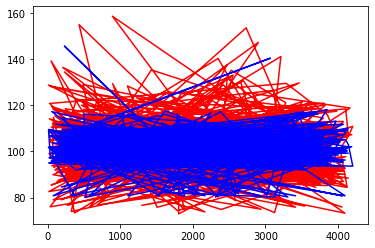

In [49]:
plt.plot(prediction['ytest'],color='red')
plt.plot(prediction['ypred'],color='blue')
plt.show()